Demo notebook to calculate recall@N metrics for a given set of predictions. 

Generate a synthetic dataset


In [52]:
import pandas as pd
import numpy as np

# Simulate predictions data
np.random.seed(42)
matrix = pd.DataFrame({
    'source': np.random.choice(['drugA', 'drugB', 'drugC', 'drugD', 'drugE', 'drugF', 'drugG', 'drugH'], size=1000),
    'target': np.random.choice(['disease1', 'disease2', 'disease3', 'disease4', 'disease5', 'disease6', 'disease7', 'disease8'], size=1000),
    'prediction': np.random.random(size=1000)
})

# Simulate ground truth data for testing
df_test_pos = pd.DataFrame({
    'source': np.random.choice(['drugA', 'drugB', 'drugC', 'drugD'], size=20),
    'target': np.random.choice(['disease1', 'disease2', 'disease3', 'disease4'], size=20),
    'split': np.random.choice(['TRAIN', 'TEST'], size=20),
    'y': 1  # Assuming all are true positives in the test set for simplicity
})

# Only consider test set items for evaluation
df_test_pos = df_test_pos[df_test_pos['split'] == 'TEST']

# Add some true positive cases to matrix to simulate a realistic scenario
matrix.loc[0:5, ['source', 'target']] = df_test_pos.iloc[0:6][['source', 'target']].values
matrix.loc[0:5, 'prediction'] = [0.9, 0.85, 0.88, 0.87, 0.86, 0.84]  # High probabilities for true positives


In [53]:
matrix

,source,target,prediction
0,drugD,disease4,0.900000
1,drugC,disease3,0.850000
2,drugC,disease2,0.880000
3,drugD,disease1,0.870000
4,drugB,disease1,0.860000
...,...,...,...
995,drugE,disease1,0.656955
996,drugA,disease2,0.956615
997,drugD,disease1,0.068958
998,drugH,disease7,0.057055


In [54]:
matrix.sort_values(by='prediction', ascending=False)

,source,target,prediction
464,drugD,disease3,0.999414
954,drugC,disease3,0.998348
54,drugG,disease1,0.997934
209,drugE,disease5,0.997125
727,drugC,disease1,0.996697
...,...,...,...
168,drugG,disease3,0.006386
483,drugF,disease1,0.005759
901,drugD,disease5,0.005230
426,drugA,disease7,0.004940


In [55]:
df_test_pos

,source,target,split,y
0,drugD,disease4,TEST,1
1,drugC,disease3,TEST,1
3,drugC,disease2,TEST,1
6,drugD,disease1,TEST,1
7,drugB,disease1,TEST,1
8,drugD,disease4,TEST,1
9,drugD,disease2,TEST,1
10,drugB,disease1,TEST,1
11,drugC,disease3,TEST,1
14,drugA,disease3,TEST,1


Define function for recall@N

In [63]:
def recall_at_n(matrix, df_test_pos, n=10):
    # Sort matrix by the 'prediction' column in descending order
    matrix_sorted = matrix.sort_values(by='prediction', ascending=False)
    
    # Get the top N predictions
    top_n_predictions = matrix_sorted.head(n)
    
    # Create a set of tuples for top N predictions (source, target)
    top_n_set = set(zip(top_n_predictions['source'], top_n_predictions['target']))
    
    # Create a set of tuples for ground truth positives
    ground_truth_set = set(zip(df_test_pos['source'], df_test_pos['target']))
    print(ground_truth_set)
    
    # Calculate hits (true positives in top N)
    hits = top_n_set.intersection(ground_truth_set)
    print(hits)
    
    # Recall@N = (Number of true positives in top N) / (Total number of true positives)
    if len(ground_truth_set) == 0:
        return 0  # Avoid division by zero
    recall = len(hits) / len(ground_truth_set)
    return recall



In [64]:
# Calculate Recall@5
recall_10 = recall_at_n(matrix, df_test_pos, n=5)
print(f"Recall@10: {recall_10:.2f}")


{('drugD', 'disease4'), ('drugB', 'disease1'), ('drugC', 'disease2'), ('drugD', 'disease2'), ('drugC', 'disease3'), ('drugA', 'disease3'), ('drugD', 'disease1')}
Recall@10: 0.14


Plot it

In [58]:
import matplotlib.pyplot as plt

def give_recall_curve(matrix, df_test_pos):
    """
    Generate and plot the recall@N curve for all values of N using the recall_at_n function.

    Args:
        matrix: DataFrame containing predictions with columns ['source'], ['target'], and ['prediction'].
        df_test_pos: DataFrame containing ground truth positives with columns ['source'] and ['target'].
    """
    # Sort the prediction matrix once to optimize performance
    matrix_sorted = matrix.sort_values(by='prediction', ascending=False)

    # Calculate recall at each position N
    recalls = [recall_at_n(matrix_sorted, df_test_pos, n) for n in range(1, len(matrix_sorted) + 1)]
    n_list = list(range(1, len(matrix_sorted) + 1))

    # Plotting the Recall Curve
    plt.figure(figsize=(10, 6))
    plt.plot(n_list, recalls, marker='o', linestyle='-', markersize=4)
    plt.title("Recall@N Curve")
    plt.xlabel("N (Top N predictions considered)")
    plt.ylabel("Recall@N")
    plt.grid(True)
    plt.show()

    return n_list, recalls


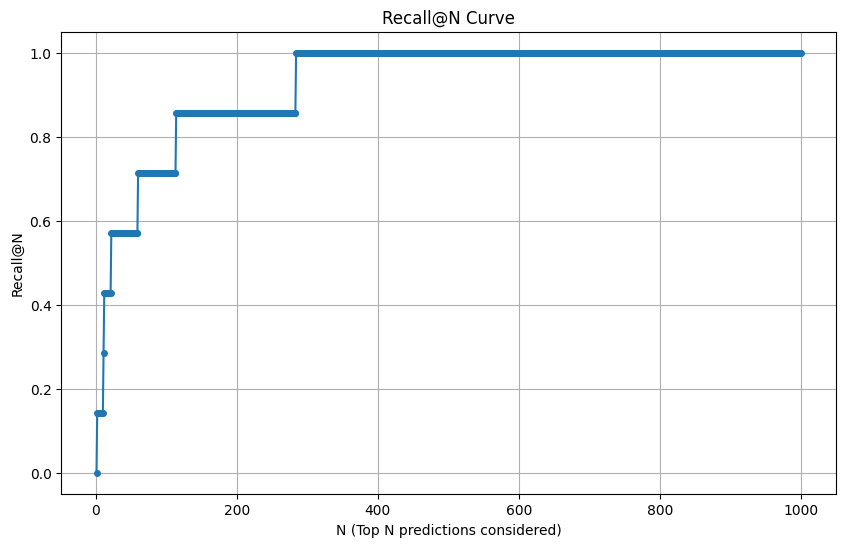

N values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [59]:
# Call the function
give_recall_curve(matrix, df_test_pos)

# Print and plot results 
print("N values:", n_list)
print("Recall values:", recalls)

In [60]:
df_test_pos

,source,target,split,y
0,drugD,disease4,TEST,1
1,drugC,disease3,TEST,1
3,drugC,disease2,TEST,1
6,drugD,disease1,TEST,1
7,drugB,disease1,TEST,1
8,drugD,disease4,TEST,1
9,drugD,disease2,TEST,1
10,drugB,disease1,TEST,1
11,drugC,disease3,TEST,1
14,drugA,disease3,TEST,1


In [49]:
1/7

0.14285714285714285